# IMDB Sentiment Analysis - LSTM

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000 # Number of words considered as features
maxlen = 500         # Keep first 500 words in each comment
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print("Number of train sequences:", len(input_train), "; Shape:", input_train.shape)
print("Number of test sequences:", len(input_test), "; Shape:", input_test.shape)

Number of train sequences: 25000 ; Shape: (25000, 500)
Number of test sequences: 25000 ; Shape: (25000, 500)


In [5]:
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

history = model.fit(
    input_train,
    y_train,
    epochs=10,
    batch_size=128, 
    validation_split=0.2
)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 54s 3ms/step - loss: 0.5596 - acc: 0.7462 - val_loss: 0.3948 - val_acc: 0.8514
Epoch 2/10
20000/20000 [==============================] - 54s 3ms/step - loss: 0.3281 - acc: 0.8716 - val_loss: 0.2869 - val_acc: 0.8852
Epoch 3/10
20000/20000 [==============================] - 52s 3ms/step - loss: 0.2483 - acc: 0.9041 - val_loss: 1.4453 - val_acc: 0.6366
Epoch 4/10
20000/20000 [==============================] - 51s 3ms/step - loss: 0.2131 - acc: 0.9220 - val_loss: 0.2848 - val_acc: 0.8800
Epoch 5/10
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1852 - acc: 0.9324 - val_loss: 0.2758 - val_acc: 0.8916
Epoch 6/10
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1614 - acc: 0.9419 - val_loss: 0.3638 - val_acc: 0.8588
Epoch 7/10
20000/20000 [==============================] - 51s 3ms/step - loss: 0.1486 - acc: 0.9482 - val_loss: 0.2928 - val_acc:

<Figure size 432x288 with 0 Axes>

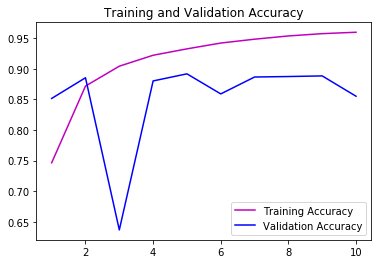

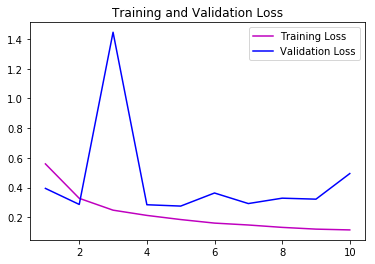

<Figure size 432x288 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt

history = history.history
acc, val_acc, loss, val_loss = history['acc'], history['val_acc'], history['loss'], history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'm', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, loss, 'm', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()